In [ ]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

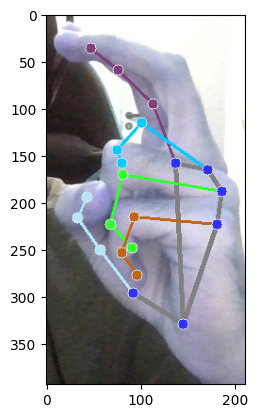

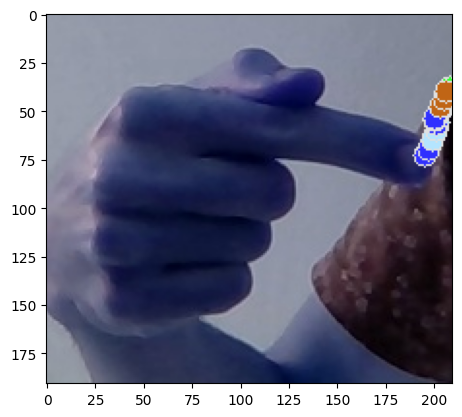

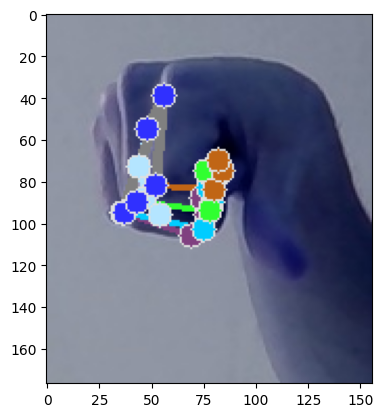

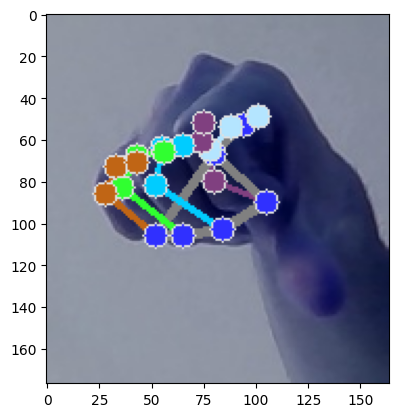

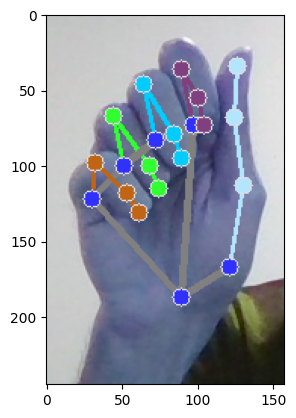

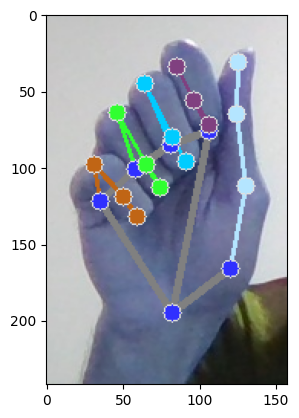

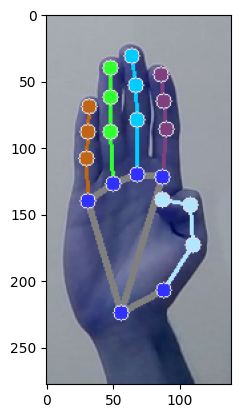

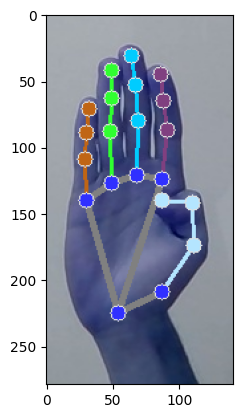

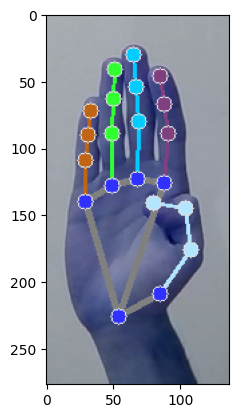

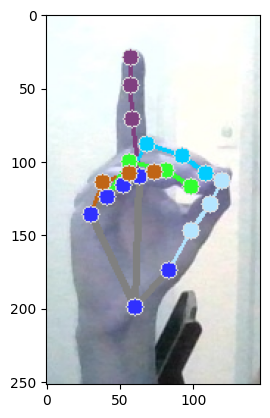

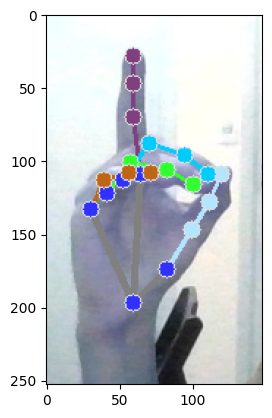

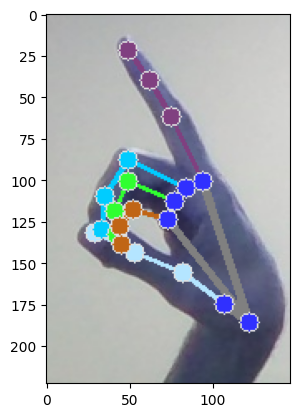

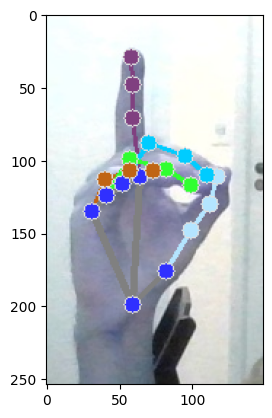

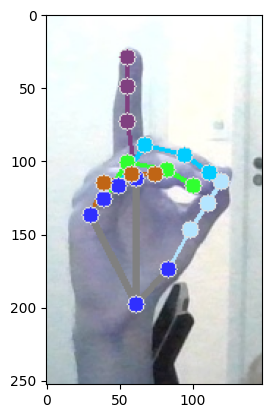

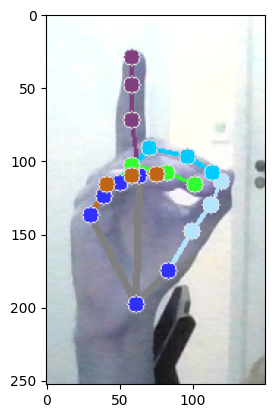

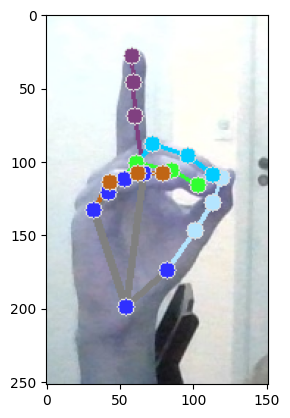

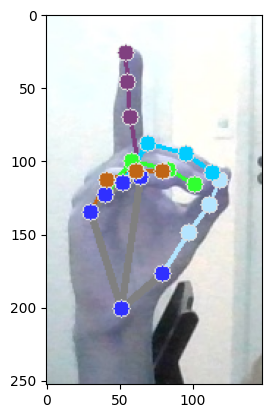

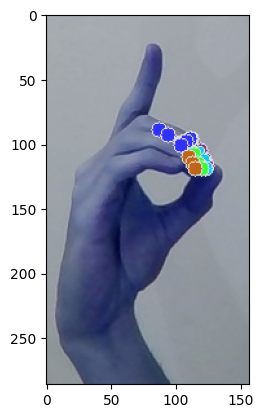

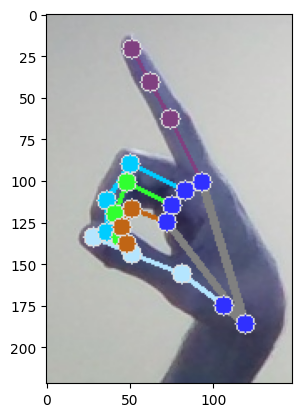

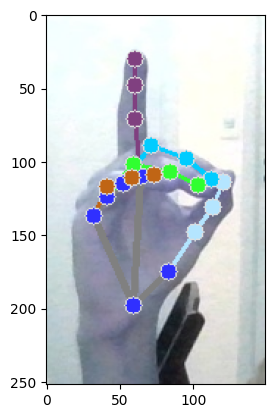

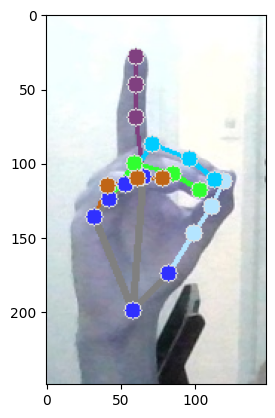

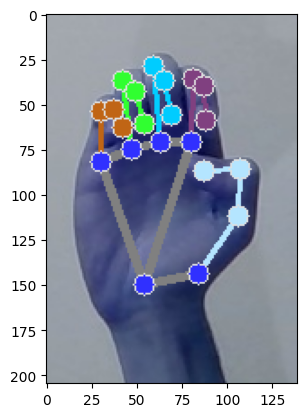

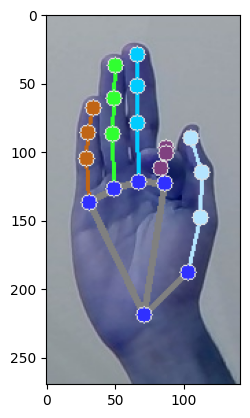

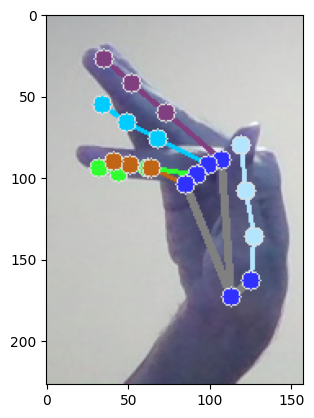

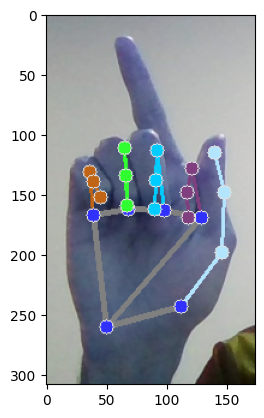

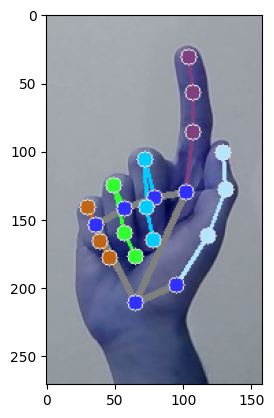

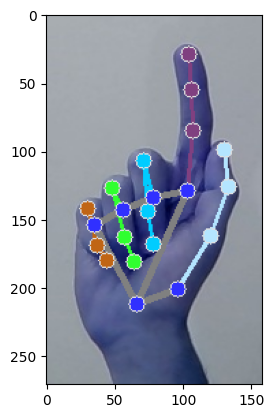

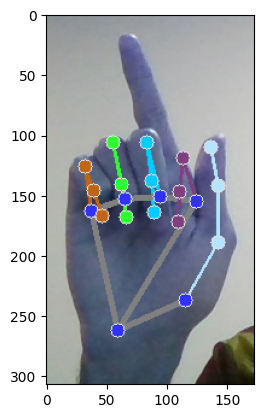

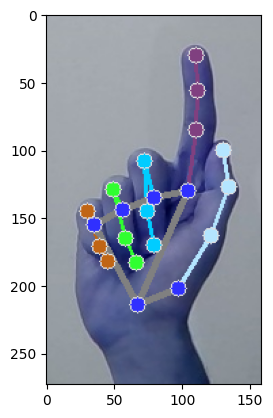

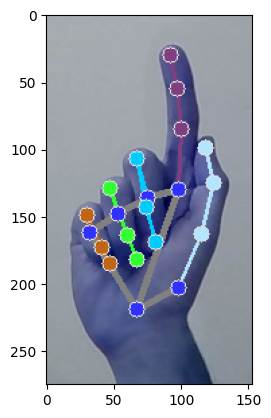

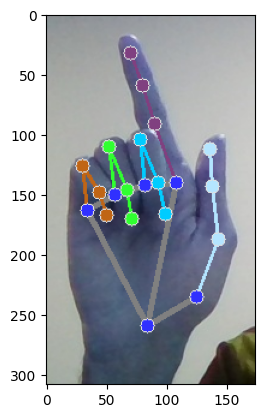

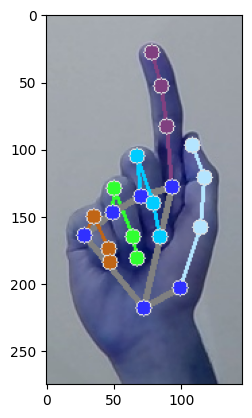

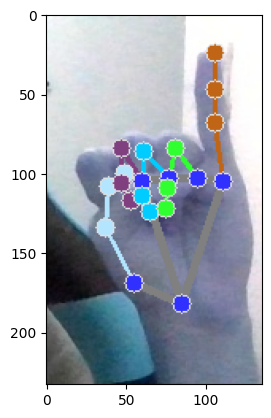

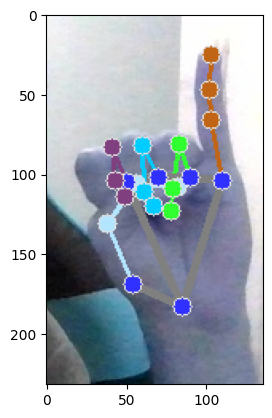

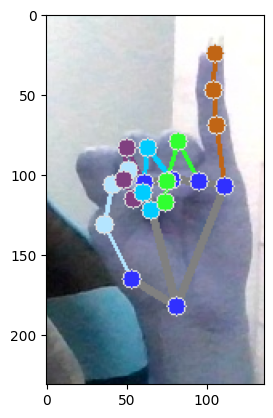

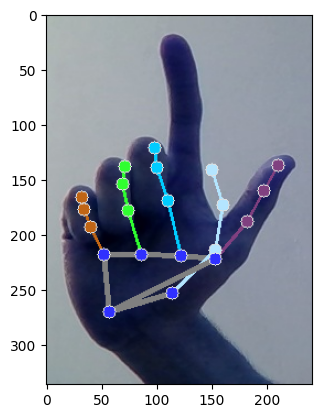

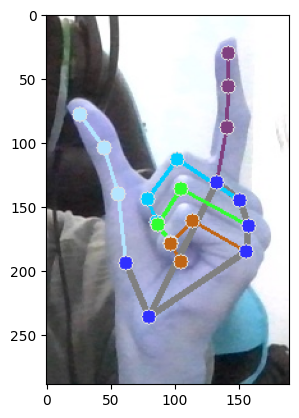

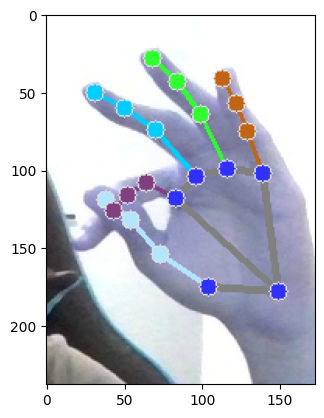

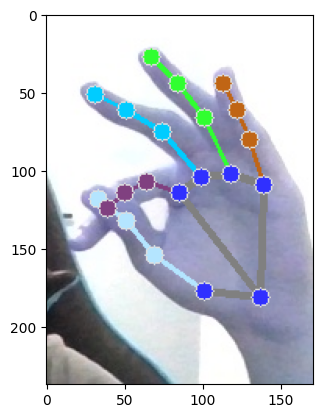

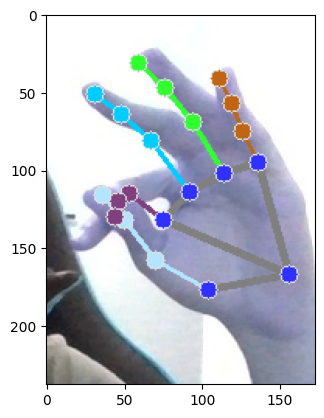

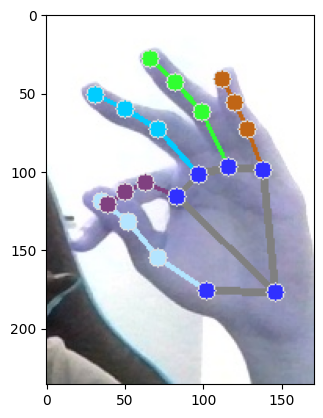

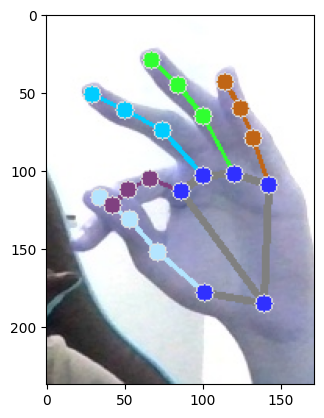

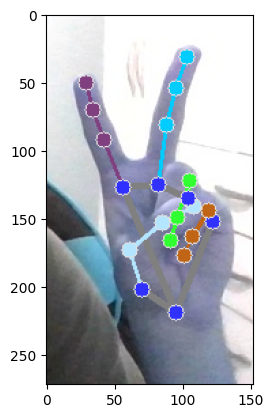

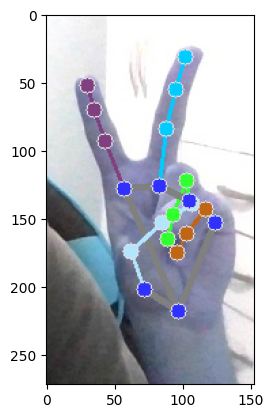

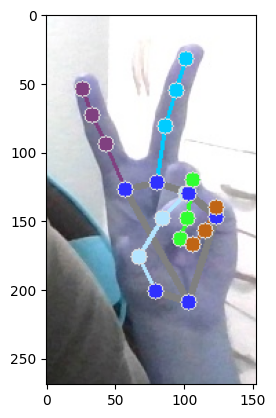

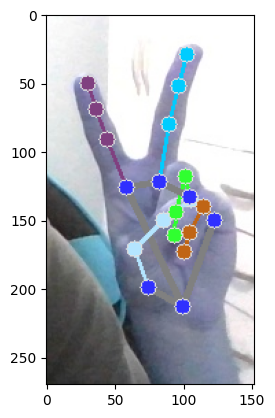

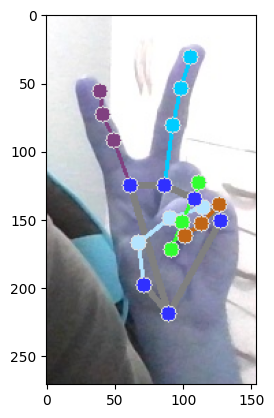

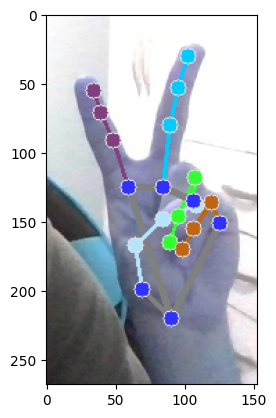

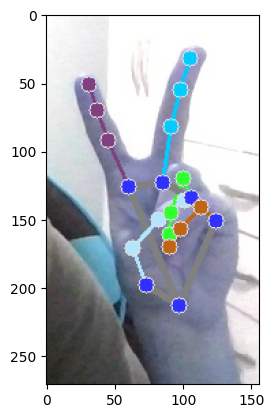

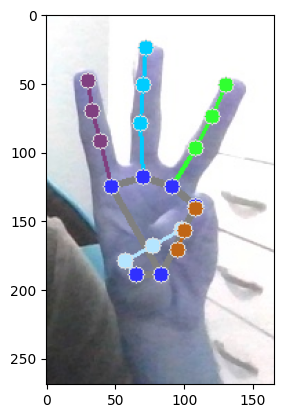

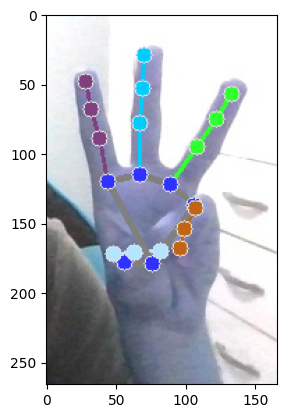

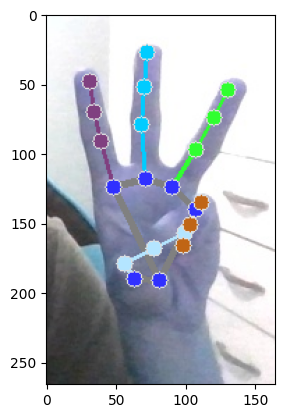

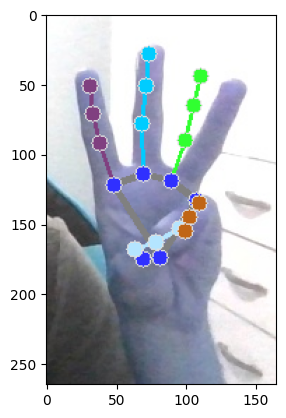

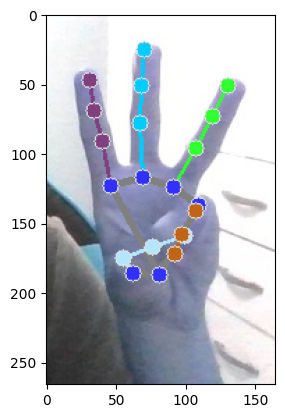

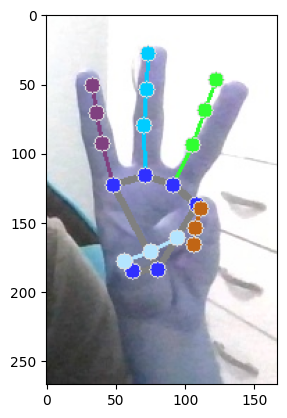

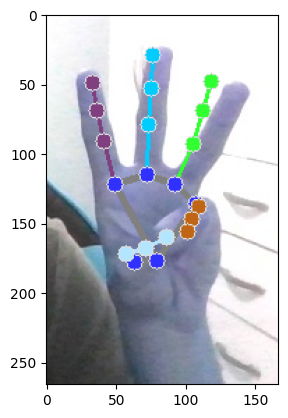

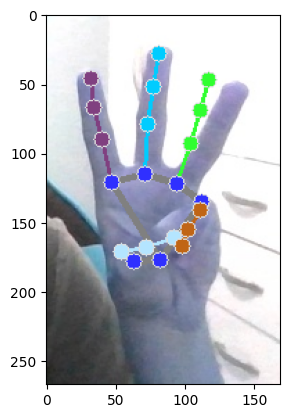

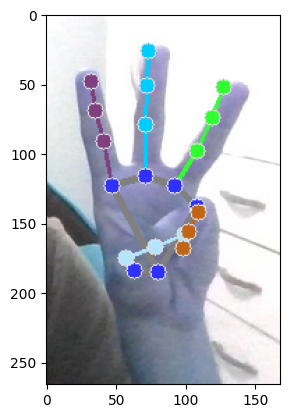

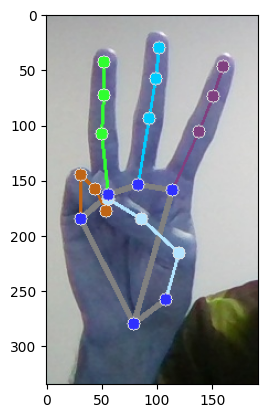

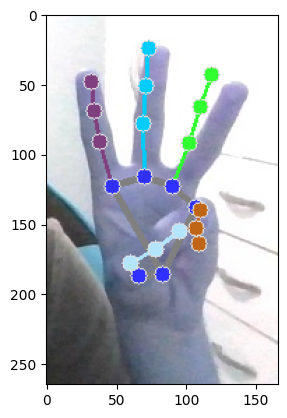

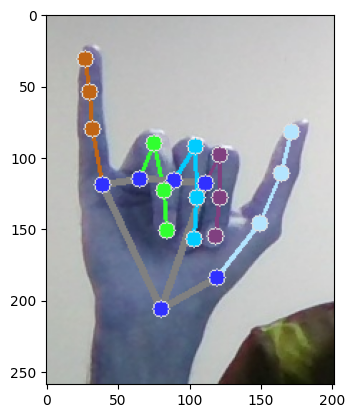

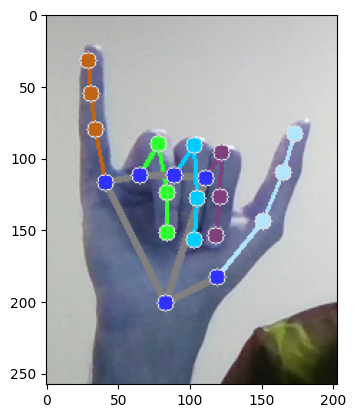

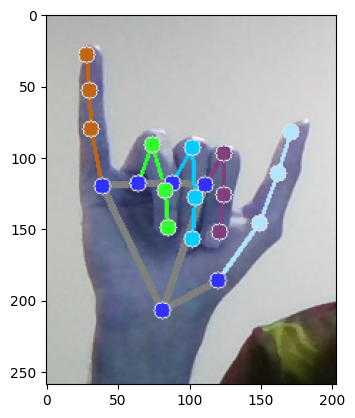

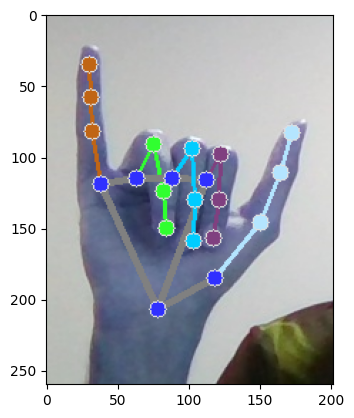

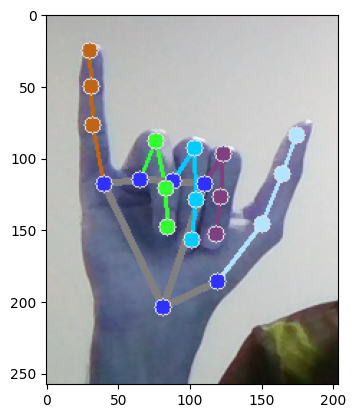

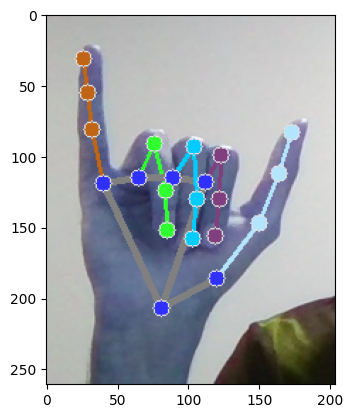

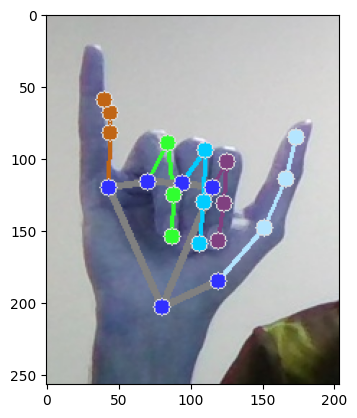

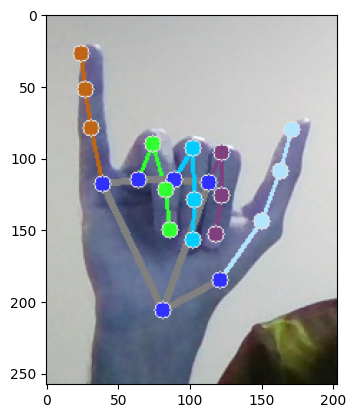

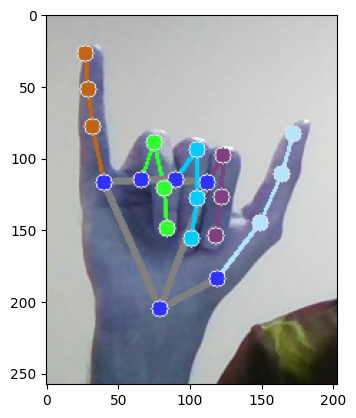

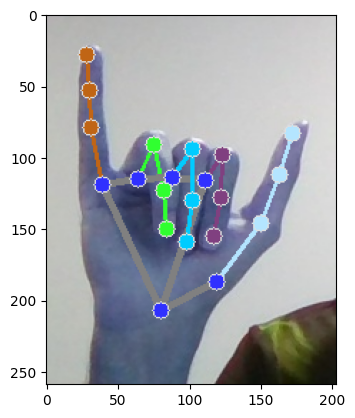

[[0.53409743309021, 0.7464512288570404, 0.2820897102355957, 0.6635942757129669, 0.11653703451156616, 0.5452309548854828, 0.0, 0.4588724672794342, 0.048658907413482666, 0.4042304754257202, 0.4938961863517761, 0.3119138479232788, 0.38108640909194946, 0.15142777562141418, 0.2057289481163025, 0.06069326400756836, 0.06879749894142151, 0.0, 0.6575484275817871, 0.32866063714027405, 0.3218098282814026, 0.20121243596076965, 0.20068678259849548, 0.2769142687320709, 0.2254953384399414, 0.31055065989494324, 0.7274754047393799, 0.38879281282424927, 0.23016294836997986, 0.3431569039821625, 0.16980749368667603, 0.47752079367637634, 0.27800601720809937, 0.5396787822246552, 0.7034540176391602, 0.47682955861091614, 0.28480345010757446, 0.4578913152217865, 0.22512277960777283, 0.554059773683548, 0.30151426792144775, 0.6135624349117279], [0.0, 0.18556325137615204, 0.006698131561279297, 0.1696227341890335, 0.01713240146636963, 0.1405710130929947, 0.02536904811859131, 0.11746339499950409, 0.0333843231201171

In [14]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = 'All_Files_Merge'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    mp_drawing.draw_landmarks(
                        img_rgb, 
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()
                    )
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                plt.figure()
                plt.imshow(img_rgb)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))           

            data.append(data_aux)
            labels.append(dir_)
        plt.show()
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
print(data, labels)
f.close()